## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'TRAIN',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 22564 files belonging to 2 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'VALID',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 2513 files belonging to 2 classes.


In [4]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[9.38398438e+01 6.43437500e+01 6.77444611e+01]
   [9.64717255e+01 6.68174591e+01 6.37392731e+01]
   [1.14530502e+02 8.39885864e+01 6.88348389e+01]
   ...
   [1.12671478e+02 1.45469055e+02 1.99585541e+02]
   [5.86340027e+01 9.72766113e+01 1.54610626e+02]
   [8.71221466e+01 1.24724350e+02 1.69981522e+02]]

  [[7.83906860e+01 6.59922485e+01 4.83614197e+01]
   [7.12472076e+01 5.84815826e+01 3.74347076e+01]
   [7.62145386e+01 6.17848511e+01 3.50444641e+01]
   ...
   [1.28909134e+02 1.58181519e+02 2.02592728e+02]
   [8.77118378e+01 1.22322144e+02 1.69579956e+02]
   [7.05520172e+01 1.03847900e+02 1.41610611e+02]]

  [[5.11317139e+01 4.56242523e+01 1.20926514e+01]
   [6.45814514e+01 5.94681702e+01 2.46908264e+01]
   [7.91470184e+01 7.23401794e+01 3.86083527e+01]
   ...
   [8.39915619e+01 1.09081406e+02 1.39954651e+02]
   [1.70093597e+02 1.98836838e+02 2.21011703e+02]
   [6.67961273e+01 9.30418701e+01 1.19405502e+02]]

  ...

  [[3.55843964e+01 9.28752136e+00 6.32019043e-02]
   [5

## Building Model

In [26]:
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [19]:
model= Sequential()

### Building Convolution Layer

In [20]:
model.add(Conv2D(filters=32, kernel_size=3, padding= 'same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [21]:
model.add(Conv2D(filters=64, kernel_size=3, padding= 'same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [22]:
model.add(Conv2D(filters=128, kernel_size=3, padding= 'same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [23]:
model.add(Conv2D(filters=256, kernel_size=3, padding= 'same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [24]:
model.add(Conv2D(filters=512, kernel_size=3, padding= 'same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [27]:
model.add(Dropout(0.25)) #To Avoid Overfitting

In [28]:
model.add(Flatten())

In [29]:
model.add(Dense(units=1500, activation='relu'))

In [30]:
model.add(Dropout(0.4))

In [31]:
#Output Layer
model.add(Dense(units=2, activation='softmax'))

### Compiling Model

In [32]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           3,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,788,726 (29.71 MB)

 Trainable params: 7,788,726 (29.71 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [34]:
training_history= model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 3268s 5s/step - accuracy: 0.7322 - loss: 1.0175 - val_accuracy: 0.8886 - val_loss: 0.3325
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 1550s 2s/step - accuracy: 0.8273 - loss: 0.4120 - val_accuracy: 0.9069 - val_loss: 0.2758
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 930s 1s/step - accuracy: 0.8469 - loss: 0.3717 - val_accuracy: 0.8997 - val_loss: 0.2861
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 990s 1s/step - accuracy: 0.8601 - loss: 0.3458 - val_accuracy: 0.9089 - val_loss: 0.2662
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 865s 1s/step - accuracy: 0.8700 - loss: 0.3289 - val_accuracy: 0.8743 - val_loss: 0.3063
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 705s 998ms/step - accuracy: 0.8705 - loss: 0.3201 - val_accuracy: 0.9093 - val_loss: 0.2444
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 850s 1s/step - accuracy: 0.8769 - loss: 0.3126 - val_accuracy: 0.9176 - val_loss: 0.2315
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 882s 1s/step - accuracy: 0.8788 - loss: 0.3070 - val

## Model Evaluaiton

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

## Saving Model

In [38]:
model.save("trained_model.h5")

In [39]:
model.save("trained_model.keras") #Less Storage

In [40]:
training_history.history

{'accuracy': [0.7819978594779968,
  0.8311913013458252,
  0.8435117602348328,
  0.8593777418136597,
  0.8669118881225586,
  0.8699255585670471,
  0.8753767013549805,
  0.8743130564689636,
  0.8758198618888855,
  0.8826448917388916],
 'loss': [0.5564775466918945,
  0.4003087878227234,
  0.37930363416671753,
  0.3461547791957855,
  0.33498144149780273,
  0.32224905490875244,
  0.3182970881462097,
  0.31780996918678284,
  0.31219542026519775,
  0.3054146468639374],
 'val_accuracy': [0.8885793685913086,
  0.9068841934204102,
  0.8997214436531067,
  0.9088738560676575,
  0.8742538690567017,
  0.909271776676178,
  0.9176283478736877,
  0.9060883522033691,
  0.916832447052002,
  0.9140469431877136],
 'val_loss': [0.3324558436870575,
  0.27583152055740356,
  0.28610387444496155,
  0.26621073484420776,
  0.30633583664894104,
  0.2444172352552414,
  0.2314741611480713,
  0.250073105096817,
  0.23235562443733215,
  0.25713613629341125]}

In [41]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [42]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

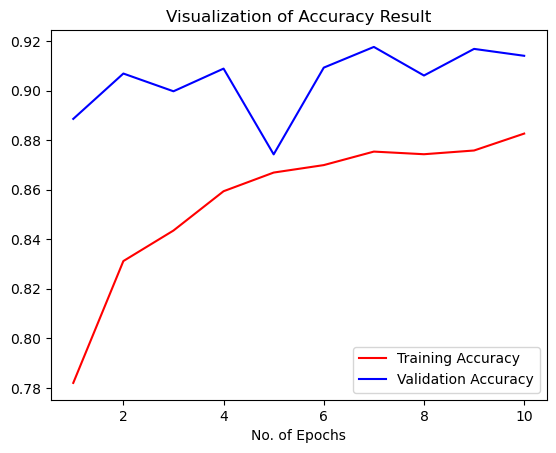

In [43]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()